# Problem 1: A Bayesian Example

When the fetus actually has Down’s syndrome, the test result is positive 98% of the time (i.e. the observed probability of a false negative is 2%). 

When the fetus does not have Down’s syndrome, the test result is negative 97% of the time (i.e. the observed probability of a false positive is 3%).

## Problem 1-A

<font color = 'blue'>Using Bayes’ theorem, estimate the overall probability that a given fetus has Down’s syndrome if the test shows positive.

Event A: a given fetus has Down’s syndrome.

Event B: the test shows positive.

$P(A|B)=P(B|A)*P(A)/P(B)$

P(B|A)=0.98, the probability of the test showing positive given that the fetus has Down's syndrome.

P(A)=1/1200, the probability that a given fetus has Down's syndrome regradless of any other information.

P(B)=1/1200×0.98+1199/1200×0.03, the probability that the test shows positive regardless of any other information.

In [1]:
P_ba=0.98;
P_a=1/1200;
P_b=(1/1200)*0.98+(1199/1200)*0.03;
P_ab=P_ba*P_a/P_b
print('the overall probability that a given fetus has Down’s syndrome if the test shows positive=')
print(P_ab)

the overall probability that a given fetus has Down’s syndrome if the test shows positive=
0.026522327469553453


<font color = 'blue'>Are you surprised by the answer? What is the fundamental problem with this test?

I'm surprised by such a  low result probability. I think the fundamental problem is that the actual probability P(A) is so low and the test result P(B|A) is not high enough to match the actual situation.

<font color = 'blue'>How accurate would the test have to be to achieve a 50% probability of having the disease if the test showed a positive result?

Set the positive test result when the fetus actually has Down’s syndrome as $x$.

Set the positive test result when the fetus actually does not have Down’s syndrome as  $y$.

$$0.5=(1/1200*x)/((1/1200)*x+(1199/1200)*y)$$

Solving the equation above, we gain $x=1199/1200$ and $y=1/1200$.

Accuracy of the test

In [2]:
print('when the fetus actually has Down’s syndrome,')
print('the positive test result=', (1199/1200))
print('the negative test result=', 1-(1199/1200))

when the fetus actually has Down’s syndrome,
the positive test result= 0.9991666666666666
the negative test result= 0.0008333333333333526


In [3]:
print('when the fetus actually does not have Down’s syndrome,')
print('the positive test result=', (1/1200))
print('the negative test result=', 1-(1/1200))

when the fetus actually does not have Down’s syndrome,
the positive test result= 0.0008333333333333334
the negative test result= 0.9991666666666666


## Problem 1-B

<font color = 'blue'>Estimate the likelihood that the fetus does not have Down’s Syndrome if the test shows a negative result.

Event A: a given fetus does not have Down’s syndrome.

Event B: the test shows negative.

$P(A|B)=P(B|A)*P(A)/P(B)$

P(B|A)=0.97, the probability of the test showing negative given that the fetus does not have Down's syndrome.

P(A)=1199/1200, the probability that a given fetus does not have Down's syndrome regradless of any other information.

P(B)=1199/1200×0.97+1/1200×0.02, the probability that the test shows negative regardless of any other information.

In [4]:
P_ba1=0.97;
P_a1=1199/1200;
P_b1=(1199/1200)*0.97+(1/1200)*0.02;
P_ab1=P_ba1*P_a1/P_b1
print('the overall probability that a given fetus does not have Down’s syndrome if the test shows negative=')
print(P_ab1)

the overall probability that a given fetus does not have Down’s syndrome if the test shows negative=
0.9999828038347448


<font color = 'blue'>Is the test more useful in this framework as a screening step when trying to decide to use more accurate (but also more invasive) tests?

I don't think the test is more useful as a screening step when trying to decide to use more accurate tests, since the accuracy of this test shown above is high enough.

## Problem 1-C

<font color = 'blue'>Finally, draw a tree diagram for this problem.

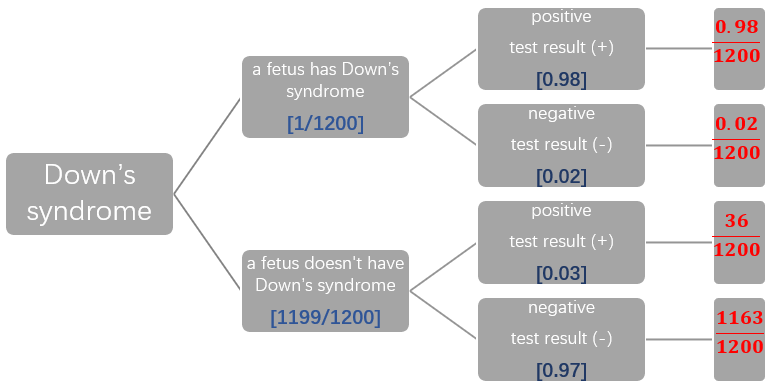

In [5]:
from IPython.display import Image
Image(filename='tree diagram.png')

# Problem 2: Continuous Bayesian Estimation of Flood Frequency

In [6]:
import numpy as np
import scipy.stats as st
import statistics as stats
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

Data: NYC_precip_priors.xlsx

Based on long-term climate records, the 24-hour duration, 100-year return period rainfall in New York City was previously estimated at 7.2 inches. 100-year rainfall indicates a storm with a rainfall total that would on average be met or exceeded only once every 100 years. In a given year, the storm has a 0.01 chance of occurrence. 

In this problem we will use Bayes’ Theorem to estimate the probability that the 7.2-inch storm is no longer the 100-year storm, that is, the probability that 7.2 inches of rainfall in a 24-hour period is likely to occur more often than every 100 years.

In this problem, 

A is the true likelihood of the storm’s occurrence, and B are the events we have observed.

Period 1 (1900-1999), storm 1 in 1999.

Period 2 (2000-2010), storm 2 in 2007.

Period 3 (2011-2019), storm 3, 4, 5, 6 in 2011, 2011, 2012, 2018.

## Problem 2-A

In [7]:
NYC_ff=pd.read_excel('NYC_precip_priors.xlsx')
NYC_ff.head()

,PDF,Storm Probability,Return Period (years)
0,0.038961,0.000,NaN
1,0.038922,0.001,1000.000000
2,0.038786,0.002,500.000000
3,0.038554,0.003,333.333333
4,0.038228,0.004,250.000000


In [8]:
m=3
n=[100,11,9]
c=[1,1,4]
nx=100

In [9]:
x = np.linspace(0, 0.1, num=nx+1)
x = np.delete(x, -1)

p_bar = sum(c) / sum(n)

ones_and_zeros = []
for i in range(sum(c)):
    ones_and_zeros.append(1)
for j in range(sum(n)-sum(c)):
    ones_and_zeros.append(0)
s_bar = stats.stdev(ones_and_zeros)

nonBayes_pdf = st.norm.pdf(x, p_bar, np.sqrt(p_bar*(1-p_bar)/(sum(n))))
nonBayes_cdf = (x[1] - x[0]) * np.cumsum(nonBayes_pdf)


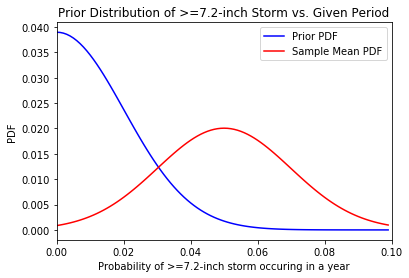

In [10]:
plt.figure()
plt.plot(NYC_ff['Storm Probability'], NYC_ff['PDF'], 'b', label='Prior PDF')
plt.plot(x, nonBayes_pdf*0.001, 'r', label = 'Sample Mean PDF')
plt.title('Prior Distribution of >=7.2-inch Storm vs. Given Period')
plt.xlabel('Probability of >=7.2-inch storm occuring in a year')
plt.ylabel('PDF')
plt.xlim(0,0.1)
plt.legend(loc='best');

In [11]:
x_nyc=np.array(NYC_ff['Storm Probability'])
cdf_nyc=np.cumsum(NYC_ff['PDF'])

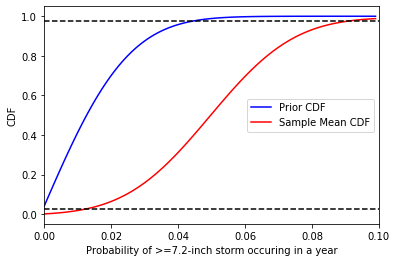

In [12]:
plt.figure()
plt.plot(x_nyc, cdf_nyc, 'b', label='Prior CDF')
plt.plot(x, nonBayes_cdf, 'r',label='Sample Mean CDF')
plt.plot([0,0.1],[0.025, 0.025], 'k--')
plt.plot([0,0.1],[0.975, 0.975], 'k--')
plt.xlabel('Probability of >=7.2-inch storm occuring in a year')
plt.ylabel('CDF')
plt.xlim(0,0.1)
plt.legend(loc='best');

In [13]:
from scipy.interpolate import interp1d

f=interp1d(cdf_nyc, x_nyc)
print('The mean of the probability=', f(0.5))

print(f(0.975))
print('The 95% confidence interval of the probability falls between 0-0.04425.')
print(1/f(0.975))
print('The return period range for 95% confidence interval is from 23 to ∞ years.')

The mean of the probability= 0.012717473075032227
0.044250694049779014
The 95% confidence interval of the probability falls between 0-0.04425.
22.59851560463816
The return period range for 95% confidence interval is from 23 to ∞ years.


## Problem 2-B&C

At each time period of interest, count the number of times the threshold has been exceeded and the number of years.

The likelihood P(B|A = p) that the storm would be exceeded m times in n years (event B) for a storm probability p (event A = p) is given by:

P(B|A = p) = binomdist(m,n,p)

In [14]:
# This is P(B|A)
likelihood = []
for i in range(0, nx):
    likelihood.append(st.binom.pmf(c[0], n[0], x[i]))

Calculate the posterior likelihood of the 7.2-inch storm’s probability after the period 1900-1999, which includes only Hurricane Floyd.

In [15]:
prior_pdf=NYC_ff['PDF']
prior_cdf=cdf_nyc

Use the continuous version of Bayes’ Theorem to calculate the probability of A at all values of p.

In [16]:
# This is P(B|A)*P(A)
post_pdf1 = []
for j in range(0, nx-1):
    post_pdf1.append(likelihood[j] * prior_pdf[j])

In [17]:
# Now consider each test in sequence (some of this is repeat from above; 
# above was for illustration)

post_pdf = np.empty([m+1,nx])
post_cdf = np.empty([m+1,nx])
post_pdf.fill(np.nan)
post_cdf.fill(np.nan)

post_pdf[0] = prior_pdf   # This is P(A) for all x
post_cdf[0] = prior_cdf

likelihood = np.empty([m,nx])
likelihood.fill(np.nan)

for i in range(0, m):   # loop through each test
    for j in range(0, nx):   # loop through each incremental fraction correct
        # calculate likelihood of test score given students' "true" fraction correct
        likelihood[i,j] = st.binom.pmf(c[i], n[i], x[j])
        #now calculate the posterior likelihood using Bayes' Theorem
        post_pdf[i+1,j] = likelihood[i,j] * post_pdf[i,j]

        
    # normalize so that area under curve is 1 and then calculate CDF
    post_pdf[i + 1] = post_pdf[i + 1]/((x[1] - x[0])*np.nansum(post_pdf[i + 1]))
    # right here we are normalizing by P(B) which is SUM of P(B|A)*P(A)
    # over all values of A, applying the chain rule
    post_cdf[i + 1] = (x[2] - x[1])*np.cumsum(post_pdf[i + 1])

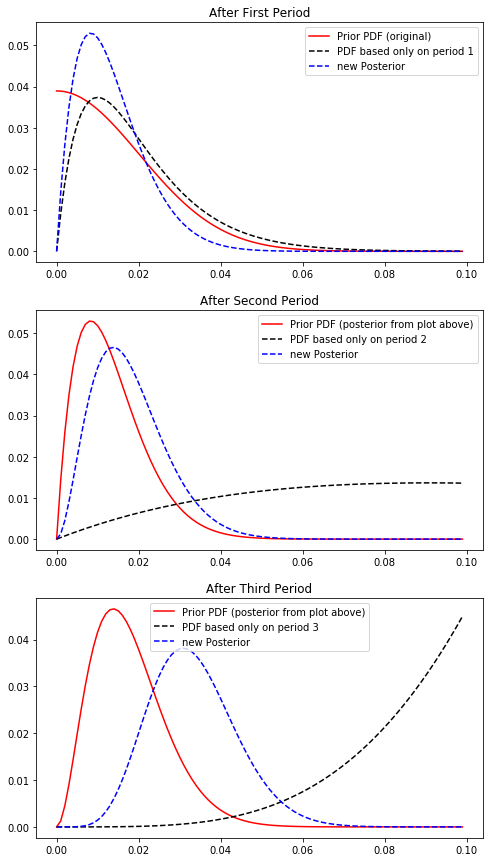

In [18]:
y_likelihood = np.zeros_like(likelihood)
for i in range (likelihood.shape[0]):
    for j in range(likelihood.shape[1]):
        y_likelihood[i,j] = likelihood[i,j] / (np.sum(likelihood[i]) * (x[1] - x[0]))

f, ax = plt.subplots(3,1,figsize=(8,15))
ax[0].plot(x, post_pdf[0], 'r', label='Prior PDF (original)')        
ax[0].plot(x, y_likelihood[0]*0.001, 'k--', label='PDF based only on period 1')    
ax[0].plot(x, post_pdf[1]*0.001, 'b--', label='new Posterior')
ax[0].set_title('After First Period')
ax[0].legend(loc='best');

ax[1].plot(x, post_pdf[1]*0.001, 'r', label='Prior PDF (posterior from plot above)')    
ax[1].plot(x, y_likelihood[1]*0.001, 'k--', label='PDF based only on period 2')
ax[1].plot(x, post_pdf[2]*0.001, 'b--', label='new Posterior')
ax[1].set_title('After Second Period')
ax[1].legend(loc='best');

ax[2].plot(x, post_pdf[2]*0.001, 'r', label='Prior PDF (posterior from plot above)')    
ax[2].plot(x, y_likelihood[2]*0.001, 'k--', label='PDF based only on period 3')
ax[2].plot(x, post_pdf[3]*0.001, 'b--', label='new Posterior')
ax[2].set_title('After Third Period')
ax[2].legend(loc='best');

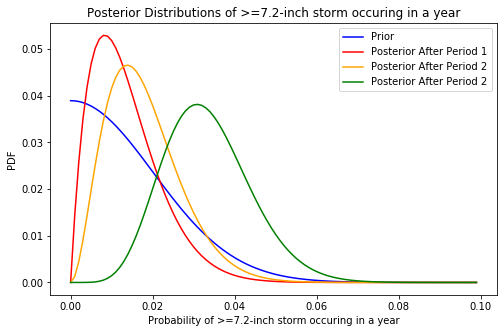

In [19]:
plt.figure(figsize=(8,5))
plt.plot(x, post_pdf[0],'b', label='Prior')
plt.plot(x, post_pdf[1]*0.001, 'r', label='Posterior After Period 1')
plt.plot(x, post_pdf[2]*0.001, 'orange', label='Posterior After Period 2')
plt.plot(x, post_pdf[3]*0.001, 'green', label='Posterior After Period 2')
plt.xlabel('Probability of >=7.2-inch storm occuring in a year')
plt.ylabel('PDF')
plt.legend(loc='best')
plt.title('Posterior Distributions of >=7.2-inch storm occuring in a year');

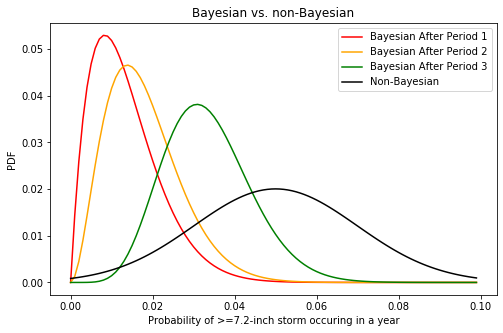

In [20]:
plt.figure(figsize=(8,5))
plt.plot(x, post_pdf[1]*0.001, 'r', label='Bayesian After Period 1')
plt.plot(x, post_pdf[2]*0.001, 'orange', label='Bayesian After Period 2')
plt.plot(x, post_pdf[3]*0.001, 'g', label='Bayesian After Period 3')
plt.plot(x, nonBayes_pdf*0.001, 'k', label = 'Non-Bayesian')
plt.title('Bayesian vs. non-Bayesian')
plt.xlabel('Probability of >=7.2-inch storm occuring in a year')
plt.ylabel('PDF')
plt.legend(loc='best')

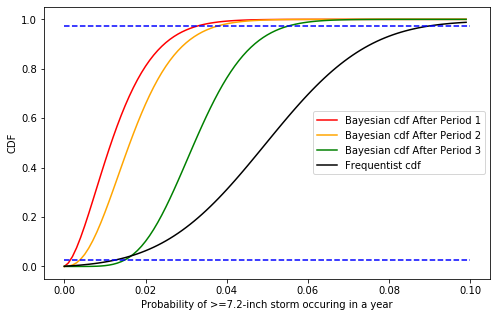

In [21]:
plt.figure(figsize=(8,5))
plt.plot(x, post_cdf[1], 'r', label='Bayesian cdf After Period 1')
plt.plot(x, post_cdf[2], 'orange', label='Bayesian cdf After Period 2')
plt.plot(x, post_cdf[3], 'g', label='Bayesian cdf After Period 3')
plt.plot(x, nonBayes_cdf, 'k',label='Frequentist cdf')
plt.plot([0,0.1],[0.025, 0.025], 'b--')
plt.plot([0,0.1],[0.975, 0.975], 'b--')
plt.xlabel('Probability of >=7.2-inch storm occuring in a year')
plt.ylabel('CDF')
plt.legend(loc='best')

<font color = 'blue'>After Period 1 (1900-1999):

In [22]:
f_p1=interp1d(post_cdf[1], x)
print('The mean of the probability=', f_p1(0.5))

print(f_p1(0.025))
print(f_p1(0.975))
print('The 95% confidence interval of the probability falls between 0.0014-0.03323.')
print(1/f_p1(0.975))
print(1/f_p1(0.025))
print('The return period range for 95% confidence interval is from 30 to 708 years.')

The mean of the probability= 0.011536773823693483
0.0014116352846001673
0.0332312992175132
The 95% confidence interval of the probability falls between 0.0014-0.03323.
30.092112663262675
708.398274617541
The return period range for 95% confidence interval is from 30 to 708 years.


<font color = 'blue'>After Period 2 (2000-2010):

In [23]:
f_p2=interp1d(post_cdf[2], x)
print('The mean of the probability=', f_p2(0.5))

print(f_p2(0.025))
print(f_p2(0.975))
print('The 95% confidence interval of the probability falls between 0.0037-0.03820.')
print(1/f_p2(0.975))
print(1/f_p2(0.025))
print('The return period range for 95% confidence interval is from 26 to 269 years.')

The mean of the probability= 0.016161580168471204
0.003715286355511129
0.038200559034140845
The 95% confidence interval of the probability falls between 0.0037-0.03820.
26.177627377292403
269.15825707933226
The return period range for 95% confidence interval is from 26 to 269 years.


<font color = 'blue'>After Period 3 (2011-2019):

In [24]:
f_p3=interp1d(post_cdf[3], x)
print('The mean of the probability=', f_p3(0.5))

print(f_p3(0.025))
print(f_p3(0.975))
print('The 95% confidence interval of the probability falls between 0.01471-0.05562.')
print(1/f_p3(0.975))
print(1/f_p3(0.025))
print('The return period range for 95% confidence interval is from 18 to 68 years.')

The mean of the probability= 0.032048767447938845
0.014712740465401226
0.0556213741240648
The 95% confidence interval of the probability falls between 0.01471-0.05562.
17.97870001862011
67.96830286999352
The return period range for 95% confidence interval is from 18 to 68 years.


## Problem 2-D

<font color = 'blue'>How much did the mean and 95% confidence interval return period change from the original prior return period to 2019? What does this indicate about the “true” frequency of the 7.2-inch-storm?

For the original prior:

The mean of the probability= 0.01271.

The 95% confidence interval of the probability falls between 0-0.04425.

The return period range for 95% confidence interval is from 23 to ∞ years.

For the 2011-2019:

The mean of the probability= 0.03205.

The 95% confidence interval of the probability falls between 0.01471-0.05562.

The return period range for 95% confidence interval is from 18 to 68 years.

<font color = 'red'>From the graph and result above using Bayes’ Theorem, we can know that the probability that 7.2 inches of rainfall in a 24-hour period is likely to occur more often than every 100 years, and is likely to occur about every 33 years.

# Problem 3

Update on your term project. By now you should have acquired all of the data you need for your term project.

Our project:
People have talked about stream temperatures being unhealthy for fish if snow melts earlier
(resulting in earlier streamflow). How does stream temperature in different months and different
streams relate to the onset date of snowmelt runoff (when the streams start rising)? You may
download time series of discharge and stream temperature here:
http://depts.washington.edu/mtnhydr/data/yosemite.shtml for different streams in Yosemite
National Park, California. Using a variety of techniques we learned in class, as well as others you
may encounter in the literature (at least 3 different total tests), determine whether stream
temperature is significantly changed by streamflow timing. What is your confidence in this?
You may want to consider different months of the year or different times of the day (e.g., daily
maximum temperature vs. daily mean), and you may want to compare and contrast streams of
different sizes. (See the “Guide” under “Supplemental Material” to learn more about these sites.
Also, talk to Professor Lundquist if you want data through summer 2018.)

<font color = 'red'>My project  partner: Ximin Hu.

## Problem 3-A

<font color = 'blue'>Create 2-3 plots that illustrate your data.

In [25]:
df_Q1=pd.read_csv("Lyell_blw_Maclure_timeseries_stage_Q_T_2005_2015.csv",low_memory=False)

In [26]:
#Q1_Data missing value check and Data cleaning

print (df_Q1.isnull().sum())

date_time(inGMT_PDTplus7)                                         0
 raw_pressure(cm)                                                 0
 barocorrected_pressure(cm)                                       0
 stage_in_feet(used_in_rating_curve_ft_referenced_to_bolt)        0
 estimated_discharge(cms)                                       913
lower_confidence_discharge_cms_bestestimate                   28298
upper_confidence_discharge_cms_bestestimate                   28871
 water_temperature(deg_C)                                         0
 instrument_ID                                                    0
 offset_cm(cm_to_correct_solinst_to_bolt)                         0
 offset_ft(ft_to_correct_solinst_to_bolt)                         0
dtype: int64


Since we are dealing with Temperature and Discharge, thus we remove all rows which contains null discharge value (95% confidence estimate not considered at the moment)

In [27]:
df_Q01=df_Q1[df_Q1[' estimated_discharge(cms)'].isna()==False]
df_Q01['date_time(inGMT_PDTplus7)']=pd.to_datetime(df_Q01['date_time(inGMT_PDTplus7)'])

C:\Users\LIGHTMAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


C:\Users\LIGHTMAN\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Q01 site water temperature time series plot')

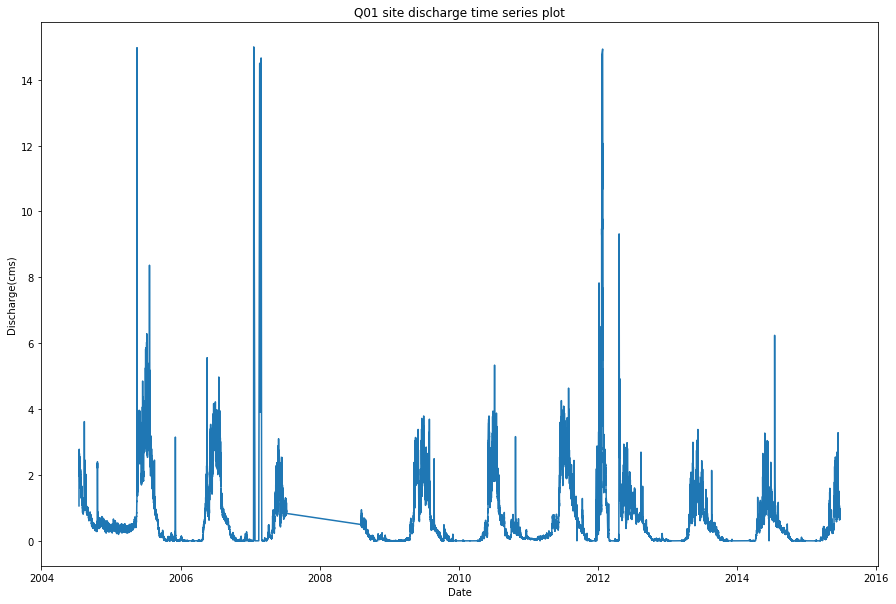

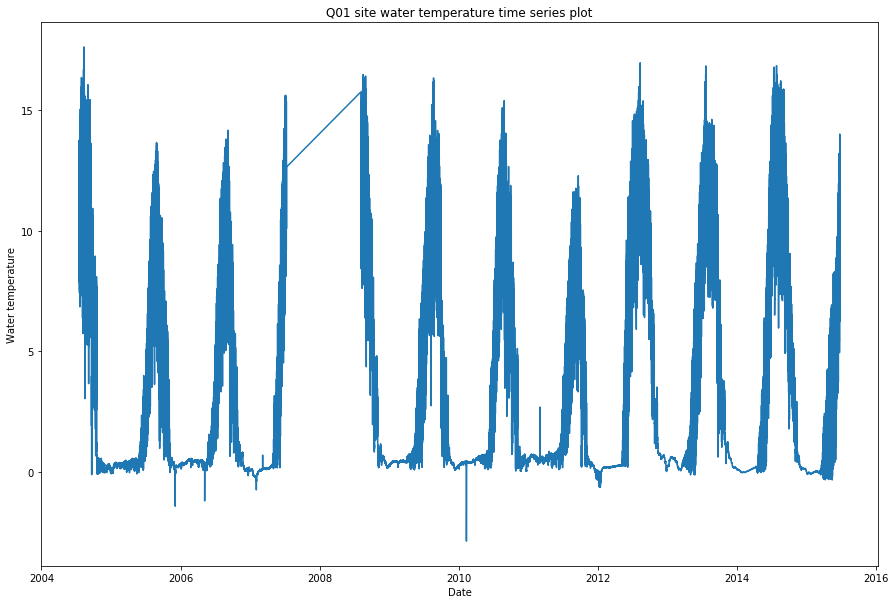

In [28]:
plt.figure(figsize=(15,10))
plt.plot(df_Q01['date_time(inGMT_PDTplus7)'],df_Q01[' estimated_discharge(cms)'])
plt.xlabel('Date')
plt.ylabel('Discharge(cms)')
plt.title('Q01 site discharge time series plot')

plt.figure(figsize=(15,10))
plt.plot(df_Q01['date_time(inGMT_PDTplus7)'],df_Q01[' water_temperature(deg_C)'])
plt.xlabel('Date')
plt.ylabel('Water temperature')
plt.title('Q01 site water temperature time series plot')

In [29]:
df_Q4=pd.read_csv('Tuolumne120_timeseries_stage_Q_T_2002_2015.csv',low_memory=False)

In [30]:
#Q4_Data missing value check and Data cleaning

print (df_Q4.isnull().sum())

date_time(UTC:LDT+7)                             0
 raw_pressure(cm)                                0
 barocorrected_pressure(cm)                      0
 offset(cm)                                      0
 stage(cm)                                       0
 estimated_discharge(cms)                        0
lower_confidence_discharge_cms_bestestimate    370
upper_confidence_discharge_cms_bestestimate    370
 instrument_ID                                   0
 water_temperature(deg_C)                        0
dtype: int64


In [31]:
df_Q4['date_time(UTC:LDT+7)']=pd.to_datetime(df_Q4['date_time(UTC:LDT+7)'])

Text(0.5, 1.0, 'Q04 site water temperature time series plot')

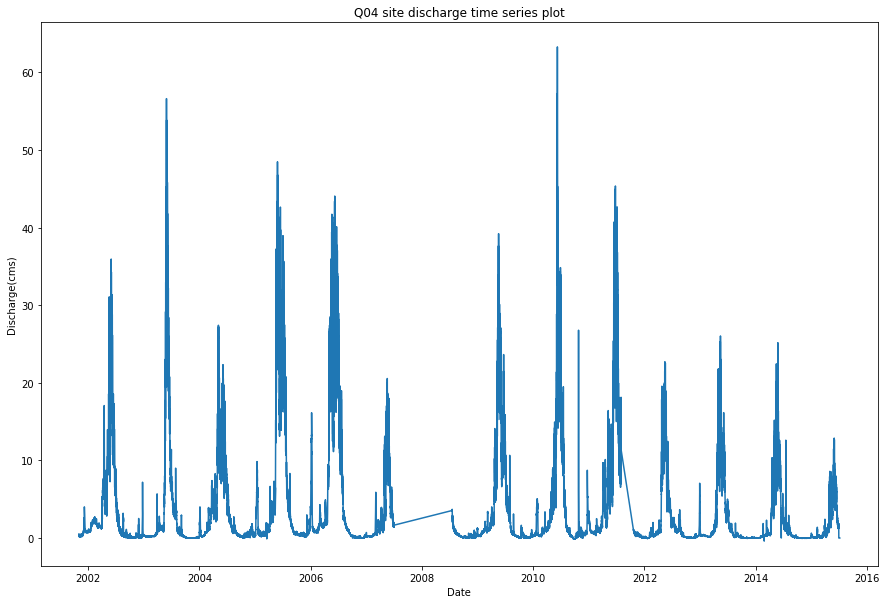

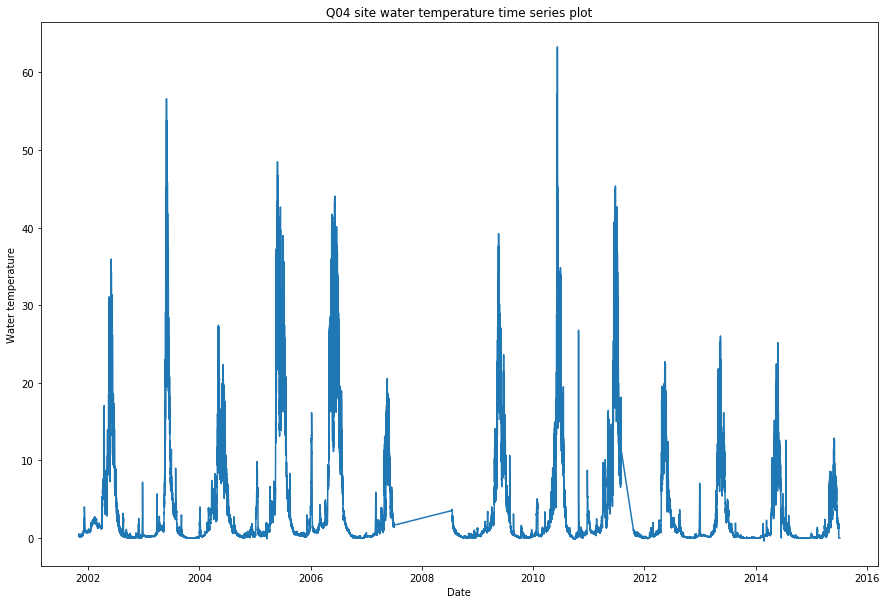

In [32]:
plt.figure(figsize=(15,10))
plt.plot(df_Q4['date_time(UTC:LDT+7)'],df_Q4[' estimated_discharge(cms)'])
plt.xlabel('Date')
plt.ylabel('Discharge(cms)')
plt.title('Q04 site discharge time series plot')

plt.figure(figsize=(15,10))
plt.plot(df_Q4['date_time(UTC:LDT+7)'],df_Q4[' estimated_discharge(cms)'])
plt.xlabel('Date')
plt.ylabel('Water temperature')
plt.title('Q04 site water temperature time series plot')

## Problem 3-B

<font color = 'blue'>Discuss the quality of your data. Do you need to take into account any erroneous values or uncertain numbers before you start your statistics?

According to the data plotted above, we can tell that there are part of the time series data missed during the whole process, but the rest of them have a rather good quality. Before further data analysis, we also need to clean the dataset, remove some abnormal points or outliers in order to reduce the effects of these noises.

## Problem 3-C

<font color = 'blue'>Write down at least two (more are also okay) very specific questions that you will answer with your data. For each question, write down which statistical tools you will use.

Q1: When is the onset date of snowmelt runoff?

For question1, we will use ANOVA test to determind when the streams start rising.

Q2: Whether stream temperature is significantly changed by streamflow timing?

For question2, we will use Monte Cario Test to determind whether stream temperature is significantly changed by streamflow timing, with large enough data samples.

## Problem 3-D

<font color = 'blue'>Based on what you have so far, do you think that your project scope is about right for a 10-page paper, or do you feel that you need to either simplify things to make it shorter or add complexity to make it longer? If you feel adjustments are needed, how to you plan to address this issue?

We have 6 rivers stram and atmospheric data for the Tuolumne River Watershed and Surroundings, which is far enough for us to analysis. We think we need to select and simplify our data.  We prefer to select two rivers with significantly different runoff for comparison. Further discuss the relationship between stream temperature and stream runoff  in the scale of different years to determind if snow melts earlier. 

## Problem 3-E

<font color = 'blue'>At this point, what do you anticipate being the most difficult parts of your term project? Do you have questions you would like help with or advice on? Write them here.

We think the most difficult parts of our project is that there is too much data to simplify and analysis, the stram and atmospheric data is recorded by every half hour for more than 5 years. 

Also we have confuse about our final goal of the project, what conclusion should we make after we analysis the relationship between temperature and runoff? Shoule we continue exploring why stream temperatures being unhealthy for fish if snow melts earlier?